#  IEEE Fraud Detection

1. on a fait une jointure externe pour fusionner l'ID de transaction, de sorte que les entrées ne soient pas manquées.
2. on a observé le nombre de valeurs non NULL dans toutes les colonnes disponibles.
3. on supprime Colonnes contenant plus de 80% des valeurs NAN. 'id_23', 'id_27'
4. Traitement des données NAN dans les colonnes de type numériques: on remplace les NAN par la valeur médiane de chaque colonne
5. Traitement des données NAN dans les colonnes de type catégoriques: on remplace les NAN par un alphabet pour chaque colonne. 
6. Conversion du catégorique en numérique: Pour des features telles que: 'M1','M2','M3', 'M4', 'M5',  'M6','M7','M8','M9','ProductCD','card4','card6','DeviceType’,'id_12','id_15','id_16','id_28','id_29','id_35','id_36','id_37','id_38' 
7. Split the training data to train and test with 80-20 ratio.
9. Appliquer Random Forest Regression
10. Appliquer XgBoost Regression

## 1 - Transaction frauduleuse et non frauduleuse


In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings


train_trans= pd.read_csv("C:/Users/youssef/Desktop/IEEE-Fraud-Detection/Nouveau dossier/train_transaction.csv") 
train_ident = pd.read_csv("C:/Users/youssef/Desktop/IEEE-Fraud-Detection/Nouveau dossier/train_identity.csv")

In [215]:
print(train_trans.head())
print(len(train_trans))

   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V336  V337  V338  V339  
0  NaN   NaN   NaN   NaN  
1  NaN   NaN   NaN  

In [216]:
print(train_ident.head())
print(len(train_ident))

   TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
1        2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2        2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
3        2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
4        2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   

   id_09  ...                id_31  id_32      id_33           id_34  id_35  \
0    NaN  ...  samsung browser 6.2   32.0  2220x1080  match_status:2      T   
1    NaN  ...   mobile safari 11.0   32.0   1334x750  match_status:1      T   
2    0.0  ...          chrome 62.0    NaN        NaN             NaN      F   
3    NaN  ...          chrome 62.0    NaN        NaN             NaN      F   
4    0.0  ...          chrome 62.0   24.0   1280x800  match_status:2      T   

  id_36 id_37  id_38  DeviceType                  

In [217]:
# Outer join on TransactionID
merged_required = pd.merge(train_trans, train_ident, on='TransactionID', how='outer')

In [218]:
merged_required.isnull().sum()

TransactionID        0
isFraud           3224
TransactionDT     3224
TransactionAmt    3224
ProductCD         3224
card1             3224
card2             3290
card3             3224
card4             3224
card5             3233
card6             3224
addr1             3530
addr2             3530
dist1             5770
dist2             7053
P_emaildomain     4112
R_emaildomain     6619
C1                3224
C2                3224
C3                3224
C4                3224
C5                3224
C6                3224
C7                3224
C8                3224
C9                3224
C10               3224
C11               3224
C12               3224
C13               3224
                  ... 
id_11             3309
id_12             3224
id_13             4210
id_14             4529
id_15             3309
id_16             3556
id_17             3329
id_18             6150
id_19             3329
id_20             3332
id_21             7110
id_22             7106
id_23      

In [219]:
print(merged_required.head())
print(merged_required.shape)

   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD    card1  \
0        2987000      0.0        86400.0            68.5         W  13926.0   
1        2987001      0.0        86401.0            29.0         W   2755.0   
2        2987002      0.0        86469.0            59.0         W   4663.0   
3        2987003      0.0        86499.0            50.0         W  18132.0   
4        2987004      0.0        86506.0            50.0         H   4497.0   

   card2  card3       card4  card5  ...                id_31  id_32  \
0    NaN  150.0    discover  142.0  ...                  NaN    NaN   
1  404.0  150.0  mastercard  102.0  ...                  NaN    NaN   
2  490.0  150.0        visa  166.0  ...                  NaN    NaN   
3  567.0  150.0  mastercard  117.0  ...                  NaN    NaN   
4  514.0  150.0  mastercard  102.0  ...  samsung browser 6.2   32.0   

       id_33           id_34  id_35 id_36 id_37  id_38  DeviceType  \
0        NaN             NaN

In [220]:
isFradTrans = merged_required[merged_required['isFraud'] == 1]
nonFraudTrans = merged_required[merged_required['isFraud'] == 0]

isFradTrans.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
203,2987203,1.0,89760.0,445.000,W,18268.0,583.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,2987240,1.0,90193.0,37.098,C,13413.0,103.0,185.0,visa,137.0,...,chrome 54.0 for android,NaN,NaN,NaN,F,F,T,T,mobile,Redmi Note 4 Build/MMB29M
243,2987243,1.0,90246.0,37.098,C,13413.0,103.0,185.0,visa,137.0,...,chrome 54.0 for android,NaN,NaN,NaN,F,F,T,T,mobile,Redmi Note 4 Build/MMB29M
245,2987245,1.0,90295.0,37.098,C,13413.0,103.0,185.0,visa,137.0,...,chrome 54.0 for android,NaN,NaN,NaN,F,F,T,T,mobile,Redmi Note 4 Build/MMB29M
288,2987288,1.0,90986.0,155.521,C,16578.0,545.0,185.0,visa,226.0,...,chrome 62.0 for ios,NaN,NaN,NaN,F,F,F,F,mobile,NaN


0.0    3916
1.0      83
Name: isFraud, dtype: int64

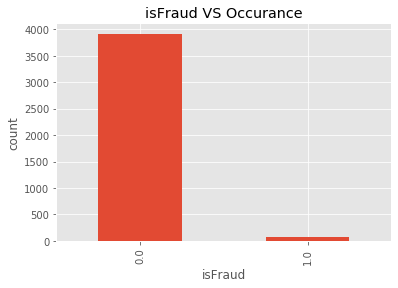

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns
merged_required['isFraud'].value_counts().plot(kind='bar')
plt.xlabel('isFraud')
plt.ylabel('count')
plt.title('isFraud VS Occurance')
merged_required['isFraud'].value_counts()

La plupart des transactions sont Non-Fraud. Presque 97% des transactions sont Non-Fraud et restant 3% sont des Fraud transactions.

Text(0.5, 1.0, 'ProductCD for Fraud Vs Non-Fraud transactions')

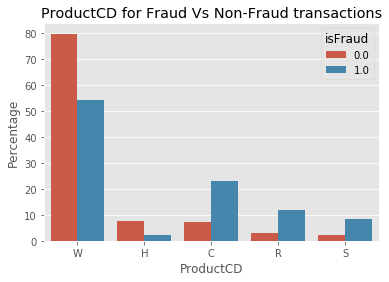

In [222]:
# Reference: https://seaborn.pydata.org/generated/seaborn.barplot.html

merge_plot = (merged_required["ProductCD"].groupby(merged_required["isFraud"]).value_counts(normalize=True).mul(100).rename("Percentage")
 .reset_index())
sns.barplot(x="ProductCD", y="Percentage", hue="isFraud", data=merge_plot)
plt.title('ProductCD for Fraud Vs Non-Fraud transactions')

Le graphique ci-dessus pour ProductCD est tracée en fonction du pourcentage de fréquence relative. Bien qu'il y ait plus des fraud transactions pour ProductCD 'W', à partir du graphique, nous pouvons observer que pour l'étiquette du produit 'C', il y a plus des  fraud transactions(40%) par rapport aux Non-Fraud (10%).

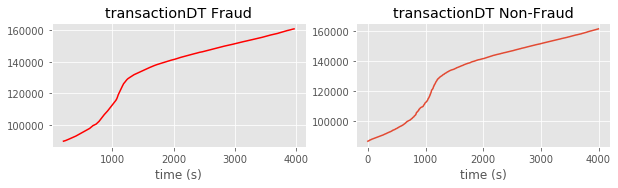

In [223]:
# plot for transactionDT for Fraud Vs Non-Fraud
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.plot(isFradTrans['TransactionDT'], 'r-')
plt.xlabel('time (s)')
plt.title('transactionDT Fraud')
plt.subplot(2,2,2)
plt.title('transactionDT Non-Fraud')
plt.plot(nonFraudTrans['TransactionDT'])
plt.xlabel('time (s)')
plt.show()

Text(0.5, 1.0, 'Card category for Fraud Vs Non-Fraud transactions')

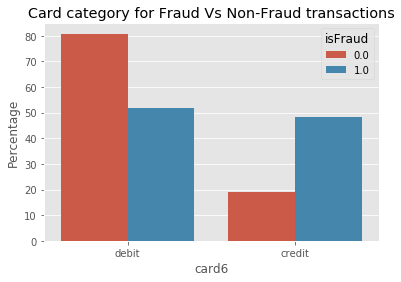

In [224]:
# Reference: https://seaborn.pydata.org/generated/seaborn.barplot.html
merge_plot = (merged_required["card6"].groupby(merged_required["isFraud"]).value_counts(normalize=True).mul(100).rename("Percentage")
 .reset_index())
sns.barplot(x="card6", y="Percentage", hue="isFraud", data=merge_plot)

plt.title('Card category for Fraud Vs Non-Fraud transactions')

Le graphique ci-dessus pour card6 est tracée en fonction du pourcentage de fréquence relative. Bien qu'il y ait plus des fraud transactions pour les cartes de débit, en comparant au nombre total de personnes qui utilisent une carte de crédit, nous pouvons considérer qu'il y a plus des fraud transactions passent dans la carte de crédit.

Text(0.5, 1.0, 'Card type for Fraud Vs Non-Fraud transactions')

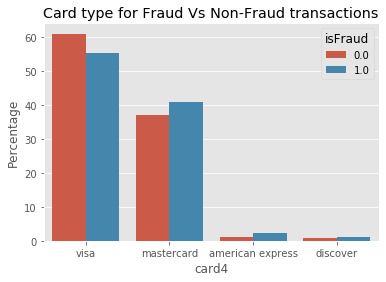

In [225]:
merge_plot = (merged_required["card4"].groupby(merged_required["isFraud"]).value_counts(normalize=True).mul(100).rename("Percentage")
 .reset_index())
sns.barplot(x="card4", y="Percentage", hue="isFraud", data=merge_plot)

plt.title('Card type for Fraud Vs Non-Fraud transactions')

le pourcentage des fraud transactions (60%) est plus élevé pour les transactions payées par carte Visa par rapport à mastercard.

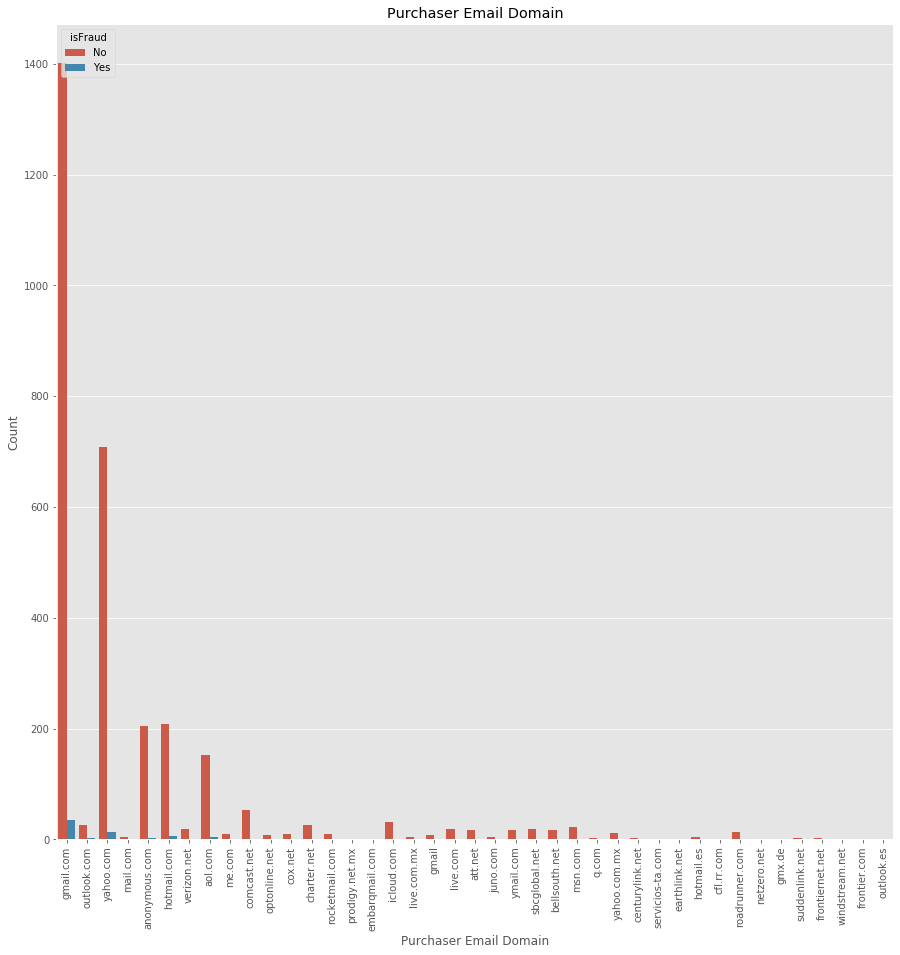

In [226]:
# Reference: https://seaborn.pydata.org/generated/seaborn.countplot.html
fig = plt.figure(figsize=(15,15))
plot1=sns.countplot(x='P_emaildomain', data=merged_required,hue='isFraud')
plot1.set_title('Purchaser Email Domain')
plot1.set_xticklabels(plot1.get_xticklabels(),rotation=90)
plot1.set_xlabel("Purchaser Email Domain")
plot1.set_ylabel("Count")
plot1.legend(title='isFraud', labels=['No','Yes'])

La plupart des fraud trasactions pour purchaser_email_domain et receiver_email_domain sont issus de gmail.com. Il n'y a pas beaucoup de perspicacité intéressante dans celle ci, comme beaucoup de gens utilisent le domaine gmail.com. Sur le graphique ci-dessus et ci-dessous, nous pouvons voir que très moins de pourcentage des frauds passent par rapport aux non-fraud transactions pour gmail.com domain.

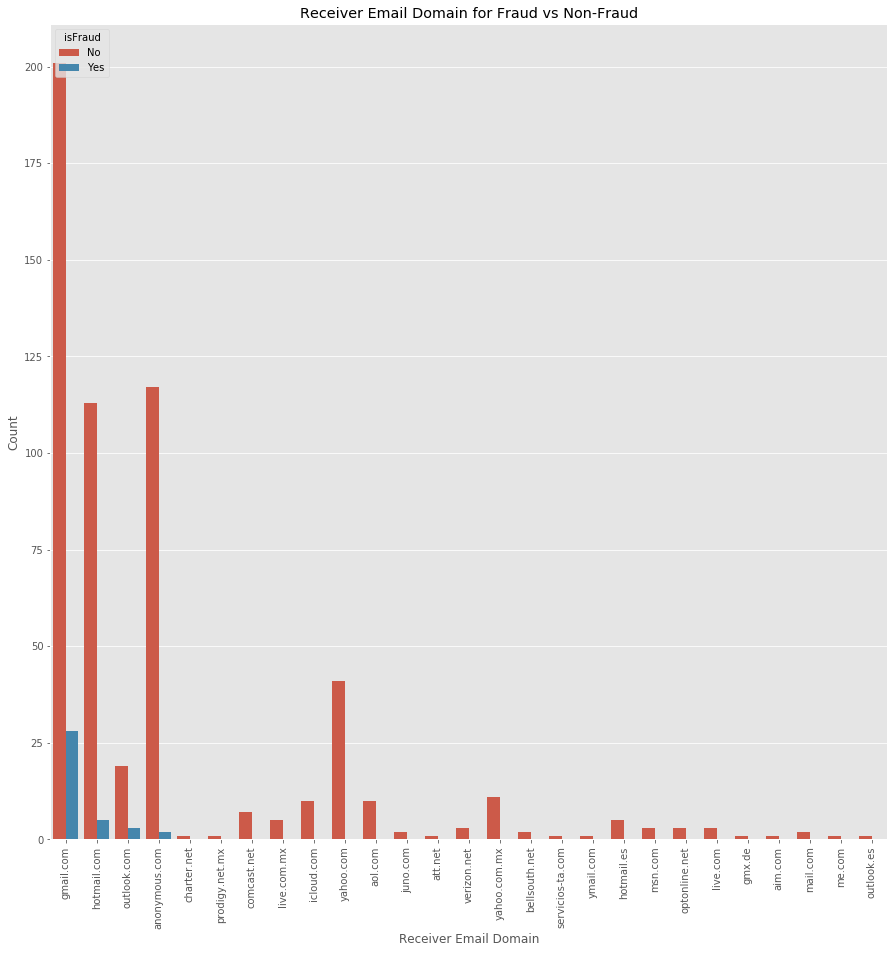

In [227]:
# Reference: https://seaborn.pydata.org/generated/seaborn.countplot.html
fig = plt.figure(figsize=(15,15))
plot1=sns.countplot(x='R_emaildomain', data=merged_required,hue='isFraud')
plot1.set_title('Receiver Email Domain for Fraud vs Non-Fraud')
plot1.set_xticklabels(plot1.get_xticklabels(),rotation=90)
plot1.set_xlabel("Receiver Email Domain")
plot1.set_ylabel("Count")
plot1.legend(title='isFraud', labels=['No','Yes'])

Text(0.5, 1.0, 'DeviceType for Fraud vs Non-Fraud')

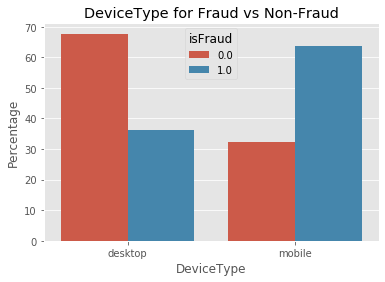

In [228]:
# Reference: https://seaborn.pydata.org/generated/seaborn.barplot.html
merge_plot = (merged_required["DeviceType"].groupby(merged_required["isFraud"]).value_counts(normalize=True).mul(100).rename("Percentage")
 .reset_index())
sns.barplot(x="DeviceType", y="Percentage", hue="isFraud", data=merge_plot)
plt.title('DeviceType for Fraud vs Non-Fraud')

Le graphique ci-dessus pour DeviceType est tracée en fonction du pourcentage de fréquence relative. Bien qu’il y ait un pourcentage égal de fraud transactions pour mobile et desktop, en comparant au nombre total de personnes qui utilisent le mobile, nous pouvons considérer qu'il y a plus de fraud transactions passe aux personnes qui utilisent le type d'appareil mobile.

Text(0.5, 1.0, 'Transaction Amount for Fraud vs Non-Fraud')

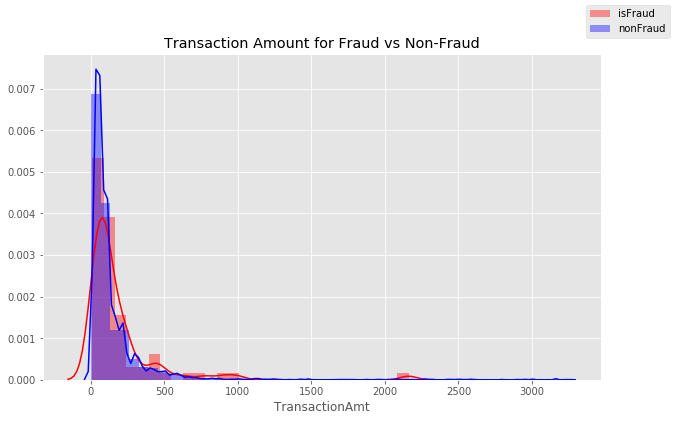

In [229]:
fig = plt.figure(figsize=(10,6))
sns.distplot(isFradTrans["TransactionAmt"] , color="red", label="Fraud")
sns.distplot(nonFraudTrans["TransactionAmt"] , color="blue", label="NonFraud")
fig.legend(labels=['isFraud','nonFraud'])
plt.title('Transaction Amount for Fraud vs Non-Fraud')

Du graphique ci-dessus, nous pouvons en déduire que les transactions de produits bon marché conduisent à plus de fraud. Comme on peut le voir, la plupart des fraud transactions arrivé pour le transaction amount compris entre $200 - $300

Text(0.5, 1.0, 'log of Transaction Amount for Fraud vs Non-Fraud')

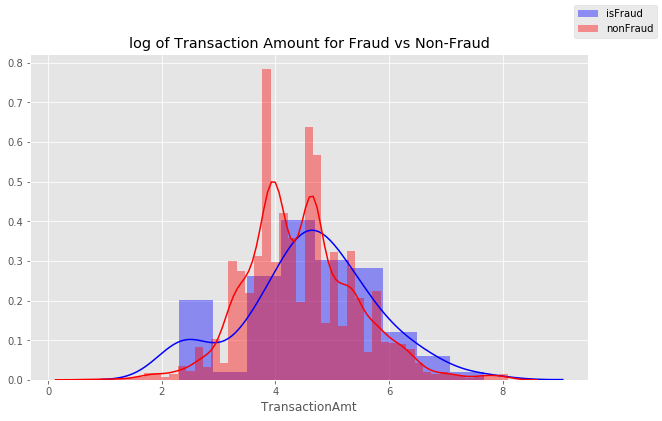

In [230]:
fig = plt.figure(figsize=(10,6))
sns.distplot(np.log(isFradTrans["TransactionAmt"]) , color="blue", label="Fraud")
sns.distplot(np.log(nonFraudTrans["TransactionAmt"]) , color="red", label="NonFraud")
fig.legend(labels=['isFraud','nonFraud'])
plt.title('log of Transaction Amount for Fraud vs Non-Fraud')

Text(0.5, 1.0, 'dist1 for Fraud vs Non-Fraud')

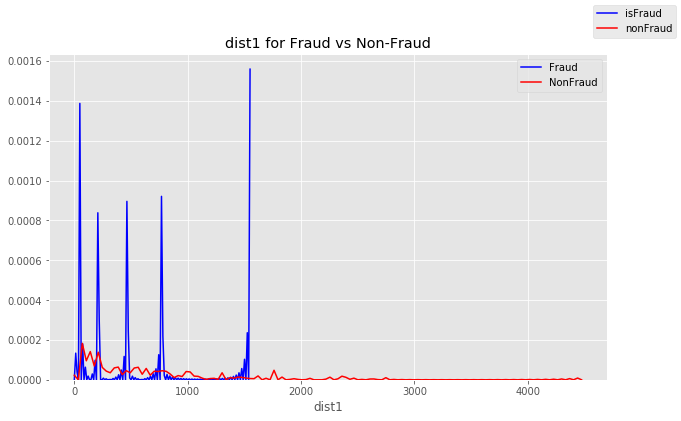

In [231]:
warnings.filterwarnings('ignore')
isFradTrans['dist1'].fillna(np.nanmedian(merged_required['dist1']), inplace=True)
isFradTrans['dist2'].fillna(np.nanmedian(merged_required['dist2']), inplace=True)
nonFraudTrans['dist1'].fillna(np.nanmedian(merged_required['dist1']), inplace=True)
nonFraudTrans['dist2'].fillna(np.nanmedian(merged_required['dist2']), inplace=True)
fig = plt.figure(figsize=(10,6))
sns.distplot(isFradTrans["dist1"] , color="blue", hist= False,label="Fraud")
sns.distplot(nonFraudTrans["dist1"] , color="red", hist=False,label="NonFraud")
fig.legend(labels=['isFraud','nonFraud'])
plt.title('dist1 for Fraud vs Non-Fraud')

Text(0.5, 1.0, 'dist2 for Fraud vs Non-Fraud')

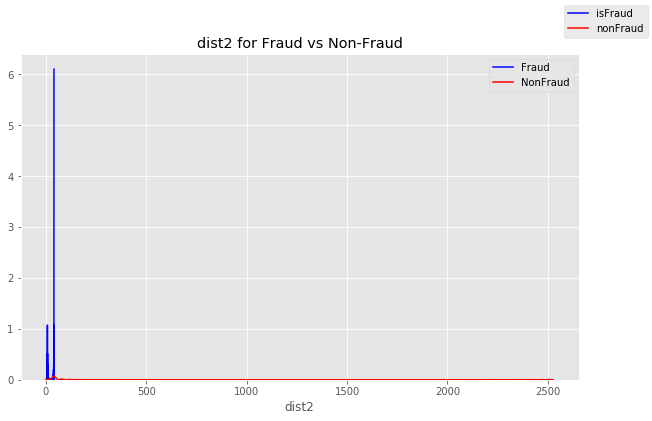

In [232]:
fig = plt.figure(figsize=(10,6))
sns.distplot(isFradTrans["dist2"] , color="blue", hist = False,label="Fraud")
sns.distplot(nonFraudTrans["dist2"] , color="red", hist = False,label="NonFraud")
fig.legend(labels=['isFraud','nonFraud'])
plt.title('dist2 for Fraud vs Non-Fraud')

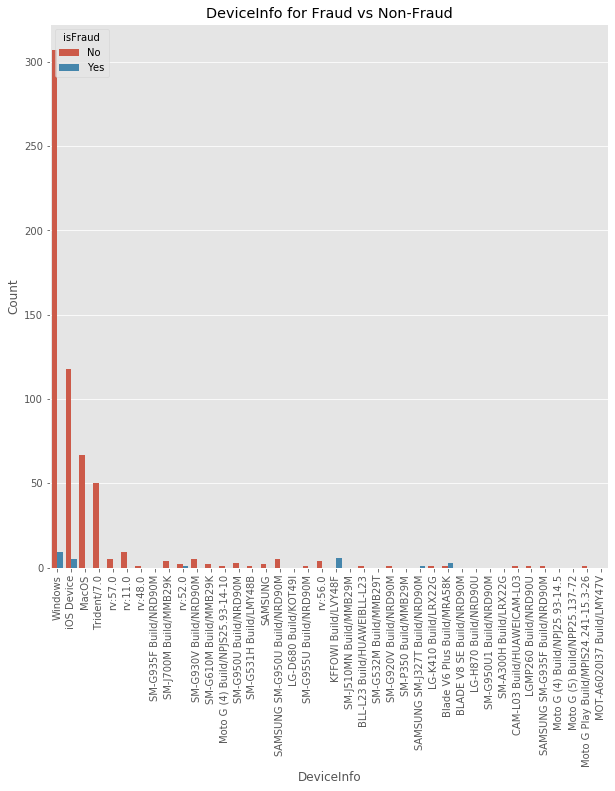

In [233]:
# As the number of labels are large, considering only top 40
# Reference: https://seaborn.pydata.org/generated/seaborn.countplot.html
fig = plt.figure(figsize=(10,10))
plot1=sns.countplot(x='DeviceInfo', data=merged_required,order = merged_required['DeviceInfo'].value_counts().iloc[:40].index,hue='isFraud')
plot1.set_title('DeviceInfo for Fraud vs Non-Fraud')
plot1.set_xticklabels(plot1.get_xticklabels(),rotation=90)
plot1.set_xlabel("DeviceInfo")
plot1.set_ylabel("Count")
plot1.legend(title='isFraud', labels=['No','Yes'])

DeviceInfo n'a rien d'intéressant. Mais comparativement, il y a beaucoup d'utilisateurs de Windows où fraud transactions se passent.

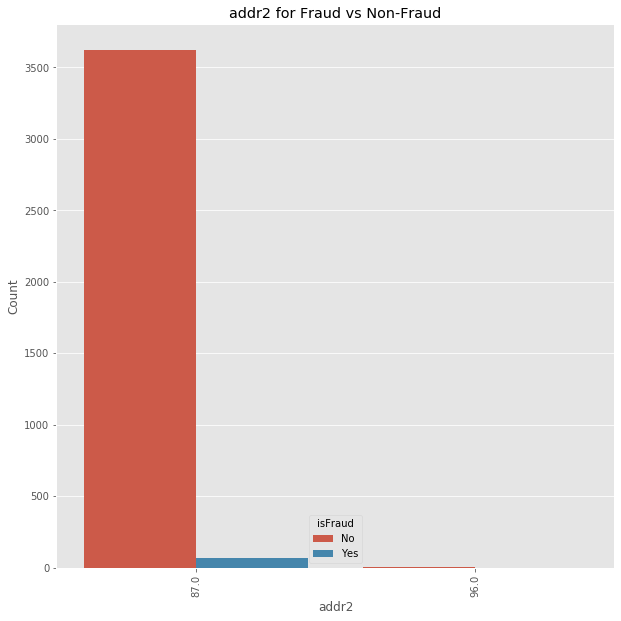

In [234]:
# though this is numerical data, lot of transactions is under 1 country code. So considered countplot for top 20.
fig = plt.figure(figsize=(10,10))
plot1=sns.countplot(x='addr2', data=merged_required,order = merged_required['addr2'].value_counts().iloc[:20].index,hue='isFraud')
plot1.set_title('addr2 for Fraud vs Non-Fraud')
plot1.set_xticklabels(plot1.get_xticklabels(),rotation=90)
plot1.set_xlabel("addr2")
plot1.set_ylabel("Count")
plot1.legend(title='isFraud', labels=['No','Yes'])

La plupart des transactions ont lieu à partir du code de pays 87. Tous les fraud users de l'indicatif de pays 87.

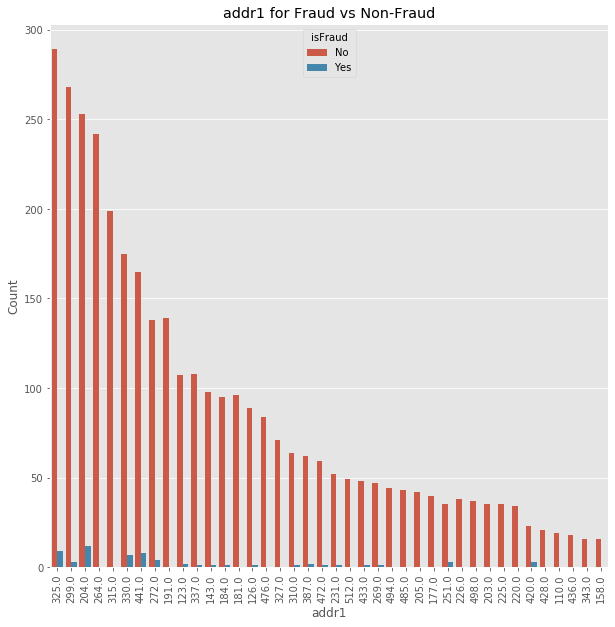

In [235]:
fig = plt.figure(figsize=(10,10))
plot1=sns.countplot(x='addr1', data=merged_required,order = merged_required['addr1'].value_counts().iloc[:40].index,hue='isFraud')
plot1.set_title('addr1 for Fraud vs Non-Fraud')
plot1.set_xticklabels(plot1.get_xticklabels(),rotation=90)
plot1.set_xlabel("addr1")
plot1.set_ylabel("Count")
plot1.legend(title='isFraud', labels=['No','Yes'])

## 2 - Fréquence de transaction

In [236]:
#Converting TransactionDT to timestamp. (Day, Hour)

merged_required['day'] = pd.to_datetime(merged_required['TransactionDT'], unit='s').dt.day
merged_required['hours'] = pd.to_datetime(merged_required['TransactionDT'], unit='s').dt.hour

In [237]:
print(merged_required.tail(15))

      TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
7208        3003999      NaN            NaN             NaN       NaN    NaN   
7209        3004000      NaN            NaN             NaN       NaN    NaN   
7210        3004001      NaN            NaN             NaN       NaN    NaN   
7211        3004002      NaN            NaN             NaN       NaN    NaN   
7212        3004003      NaN            NaN             NaN       NaN    NaN   
7213        3004004      NaN            NaN             NaN       NaN    NaN   
7214        3004008      NaN            NaN             NaN       NaN    NaN   
7215        3004010      NaN            NaN             NaN       NaN    NaN   
7216        3004012      NaN            NaN             NaN       NaN    NaN   
7217        3004016      NaN            NaN             NaN       NaN    NaN   
7218        3004018      NaN            NaN             NaN       NaN    NaN   
7219        3004020      NaN            

In [238]:
merged_required['addr2'].value_counts()

87.0    3687
96.0       6
Name: addr2, dtype: int64

Text(0.5, 0, 'hours')

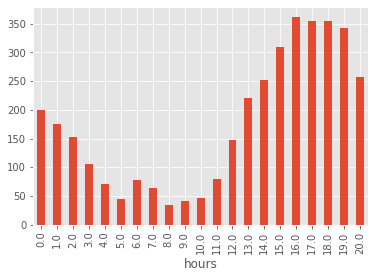

In [239]:
# Most frequent country code is 87.0 as per addr2 field. Plot graph for hours vs frequency count.
plot1 = merged_required[merged_required['addr2']==87.0]['hours'].value_counts().sort_index()
plot1.plot(kind='bar')
plt.xlabel('hours')

Code de pays le plus fréquent en addr2 field est 87.0 qui a 520481 entrées . Dans le graphique ci-dessus, la plupart des transactions ont lieu du soir à minuit(17th hour to 24rth hour). Les heures de réveil peuvent se situer autour de 10 heures du matin, le nombre de transactions ayant commencé à augmenter à partir de 10th heure. Les heures de sommeil peuvent aller de 3 à 9 heures car il y a moins de transactions.

## 3 - Product Code

Text(0.5, 1, 'ProductCD Vs TransactionAmt')

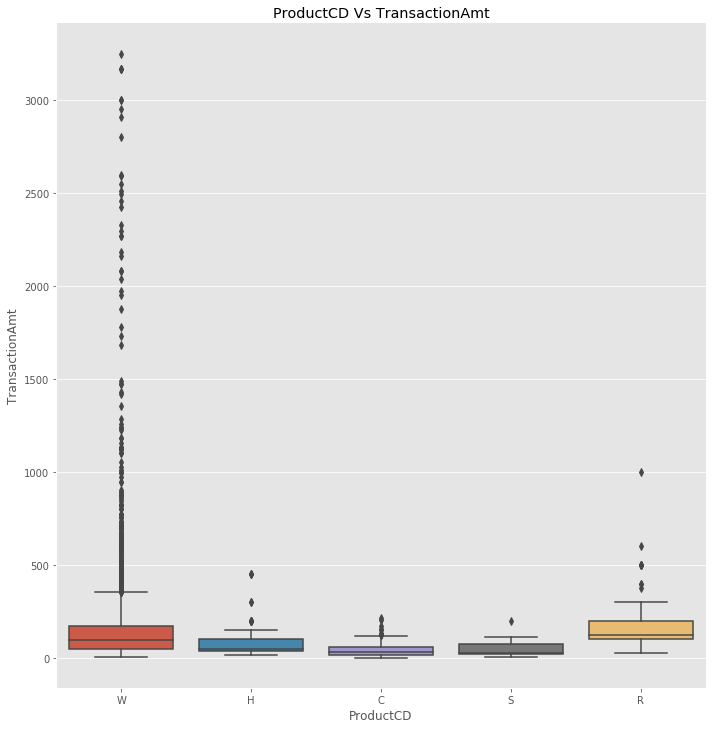

In [240]:
# Reference: https://seaborn.pydata.org/generated/seaborn.catplot.html
sns.catplot(x="ProductCD", y="TransactionAmt", hue="ProductCD",kind="box", dodge=False, data=merged_required, height=10)
plt.title('ProductCD Vs TransactionAmt')

In [241]:
w_mean = merged_required[merged_required['ProductCD'] == 'W']['TransactionAmt'].mean()
print('For ProductCD W: ',w_mean)
h_mean = merged_required[merged_required['ProductCD'] == 'H']['TransactionAmt'].mean()
print('For ProductCD H: ', h_mean)
c_mean = merged_required[merged_required['ProductCD'] == 'C']['TransactionAmt'].mean()
print('For ProductCD C: ',c_mean)
s_mean = merged_required[merged_required['ProductCD'] == 'S']['TransactionAmt'].mean()
print('For ProductCD S: ',s_mean)
r_mean = merged_required[merged_required['ProductCD'] == 'R']['TransactionAmt'].mean()
print('For ProductCD R: ',r_mean)

For ProductCD W:  168.66472274732345
For ProductCD H:  72.66220735785953
For ProductCD C:  41.38938943894391
For ProductCD S:  46.4
For ProductCD R:  164.66165413533835


À partir du graphique en barres ci-dessus et calcul de la moyenne, ProductCD 'R' et 'W' ont les produits les plus chers suivis de H, S et C.

## 4 - Coefficient de corrélation

In [242]:
np.corrcoef(merged_required['TransactionAmt'], merged_required['hours'])

array([[nan, nan],
       [nan, nan]])

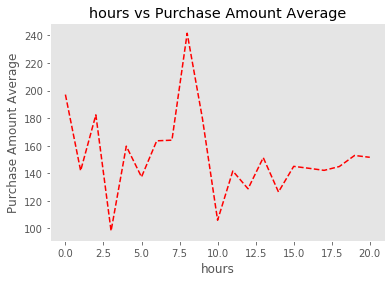

In [243]:
result_mean = merged_required['TransactionAmt'].groupby(merged_required['hours']).mean()
plt.plot(result_mean,'r--')
plt.xlabel('hours')
plt.ylabel('Purchase Amount Average')
plt.grid()
plt.title('hours vs Purchase Amount Average')
plt.show()

De la parcelle ci-dessus,purchase amount est plus élevé dans l'intervalle 14 heures à 17 heures et purchase amount est moins entre 3 à 7 heures.Nous pouvons également supposer que ces heures peuvent être des heures de sommeil où le montant de l'achat est inférieur. 
Coefficient de corrélation pour transaction amount et heures est 0.4453

## 5 - Les graph intéressant

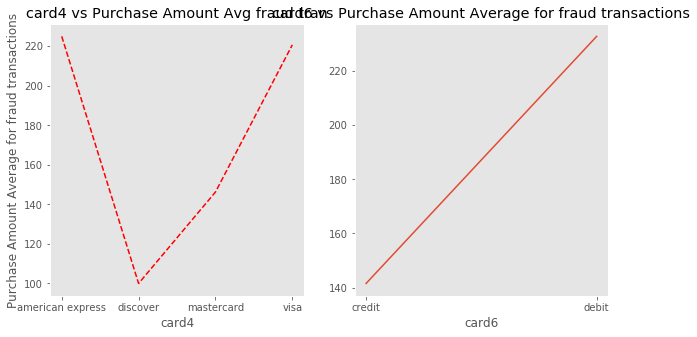

In [244]:
plt.figure(figsize=(10,5))
card4_mean = merged_required[merged_required['isFraud'] == 1]['TransactionAmt'].groupby(merged_required['card4']).mean()
card6_mean = merged_required[merged_required['isFraud'] == 1]['TransactionAmt'].groupby(merged_required['card6']).mean()
plt.subplot(1, 2, 1)
plt.plot(card4_mean,'r--')
plt.xlabel('card4')
plt.ylabel('Purchase Amount Average for fraud transactions')
plt.grid()
plt.title('card4 vs Purchase Amount Avg fraud tran')
plt.subplot(1, 2, 2)
plt.plot(card6_mean)
plt.xlabel('card6')
plt.grid()
plt.title('card6 vs Purchase Amount Average for fraud transactions')
plt.show()

Purchase amount average pour fraud transactions est plus élevé pour Discover type4 et carte de crédit de type card6.

Text(0.5, 1.0, 'DeviceInfo vs Purchase Amount Avg for fraud tran')

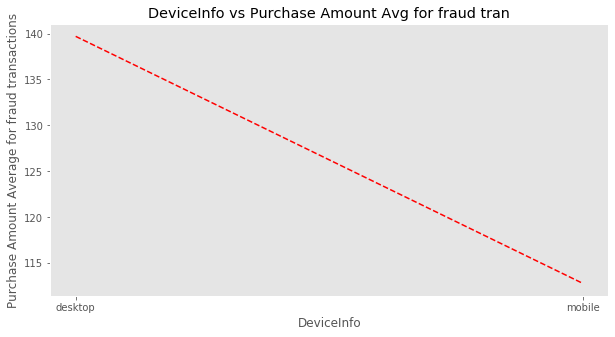

In [245]:
plt.figure(figsize=(10,5))
devicetype_mean = merged_required[merged_required['isFraud'] == 1]['TransactionAmt'].groupby(merged_required['DeviceType']).mean()
plt.plot(devicetype_mean,'r--')
plt.xlabel('DeviceInfo')
plt.ylabel('Purchase Amount Average for fraud transactions')
plt.grid()
plt.title('DeviceInfo vs Purchase Amount Avg for fraud tran')

Purchase amount average pour fraud transactions est plus élevé pour les transactions effectuées sur le bureau que pour le type d'appareil mobile.

## 6 - Resampling

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,precision_recall_curve,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import time
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix

In [247]:
train=train_trans.merge(train_ident,how='left',left_index=True,right_index=True)
y_train=train['isFraud'].astype('uint8')
y_train=train['isFraud'].astype('uint8')
print('Train shape',train.shape)

print("Data set merged ")

Train shape (3999, 435)
Data set merged 


In [248]:
X_train,X_test,y_train,y_test=train_test_split(train.drop('isFraud',axis=1),y_train,test_size=.2,random_state=1)

In [249]:
from sklearn.utils import resample

X=pd.concat([X_train,y_train],axis=1)


not_fraud=X[X.isFraud==0]
fraud=X[X.isFraud==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.isFraud.value_counts()

1    3139
0    3139
Name: isFraud, dtype: int64

Text(0, 0.5, 'count')

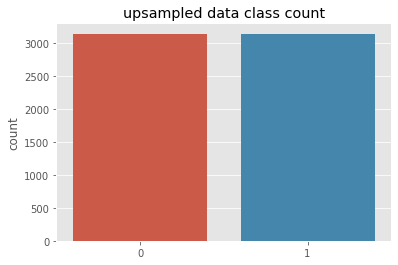

In [250]:
y=upsampled.isFraud.value_counts()
sns.barplot(y=y,x=[0,1])
plt.title('upsampled data class count')
plt.ylabel('count')

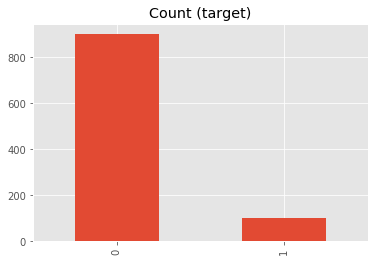

In [251]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=1000, random_state=10
)

df = pd.DataFrame(X)
df['target'] = y
df.target.value_counts().plot(kind='bar', title='Count (target)')

In [252]:
from sklearn.linear_model import LogisticRegression

def logistic(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=1)
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    prob=lr.predict_proba(X_test)
    return (prob[:,1],y_test)
probs,y_test=logistic(X,y)

In [253]:
from sklearn.metrics import roc_auc_score,precision_recall_curve,roc_curve

def plot_pre_curve(y_test,probs):
    precision, recall, thresholds = precision_recall_curve(y_test, probs)
    plt.plot([0, 1], [0.5, 0.5], linestyle='--')
    # plot the precision-recall curve for the model
    plt.plot(recall, precision, marker='.')
    plt.title("precision recall curve")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the plot
    plt.show()
    
def plot_roc(y_test,prob):
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    plt.title("ROC curve")
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    # show the plot
    plt.show()

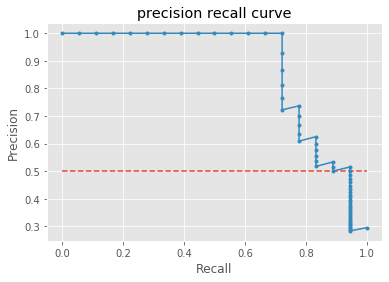

In [254]:
plot_pre_curve(y_test,probs)

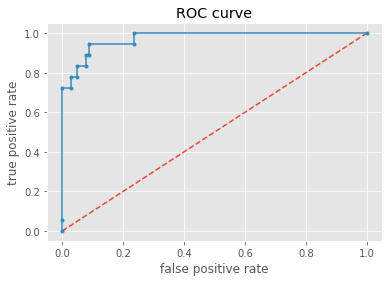

In [255]:
plot_roc(y_test,probs)


In [256]:
def plot_2d_space(X_train, y_train,X=X,y=y ,label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    
    fig,(ax1,ax2)=plt.subplots(1,2, figsize=(8,4))
   
    for l, c, m in zip(np.unique(y), colors, markers):
        ax1.scatter(
            X_train[y_train==l, 0],
            X_train[y_train==l, 1],
            c=c, label=l, marker=m
        )
    for l, c, m in zip(np.unique(y), colors, markers):
        ax2.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
   
    ax1.set_title(label)
    ax2.set_title('original data')
    plt.legend(loc='upper right')
    plt.show()

In [257]:
def plot_2d_space(X_train, y_train,X=X,y=y ,label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    
    fig,(ax1,ax2)=plt.subplots(1,2, figsize=(8,4))
   
    for l, c, m in zip(np.unique(y), colors, markers):
        ax1.scatter(
            X_train[y_train==l, 0],
            X_train[y_train==l, 1],
            c=c, label=l, marker=m
        )
    for l, c, m in zip(np.unique(y), colors, markers):
        ax2.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
   
    ax1.set_title(label)
    ax2.set_title('original data')
    plt.legend(loc='upper right')
    plt.show()

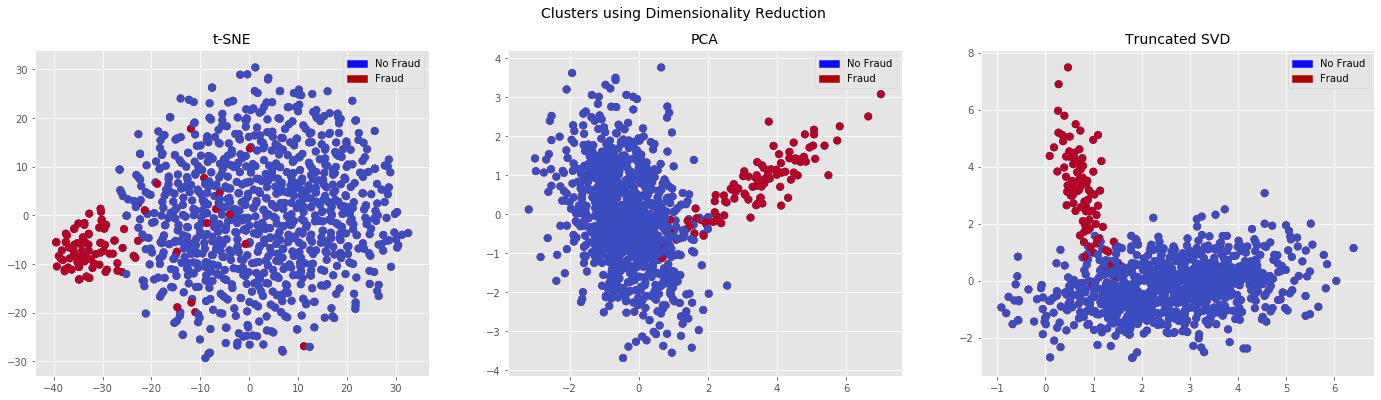

In [258]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])
# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

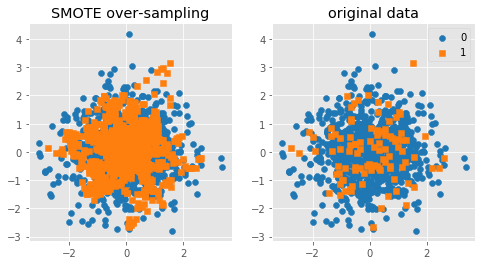

In [259]:
import imblearn

from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_sample(X, y)

plot_2d_space(X_sm, y_sm,X,y, 'SMOTE over-sampling')

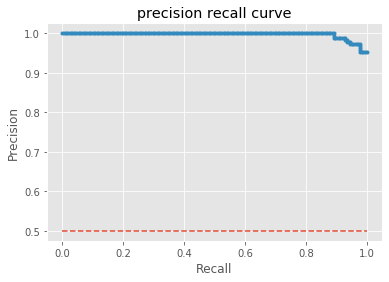

In [260]:
probs,y_test=logistic(X_sm,y_sm)
plot_pre_curve(y_test,probs)

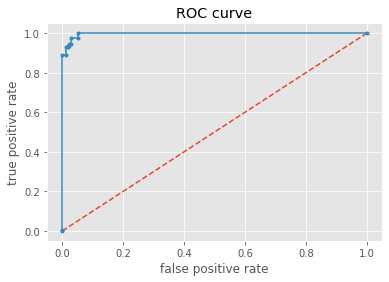

In [261]:
plot_roc(y_test,probs)


In [262]:
X_test, y_test = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=1000, random_state=10
)


In [108]:
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics


from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_sm, y_sm)
y_predictionsvm = clf.predict(X_test)
RMSE_svm_smote = np.sqrt(metrics.mean_squared_error(y_test, y_predictionsvm))
auc_svm_smote = roc_auc_score(y_test, y_predictionsvm)
r2_svm_smote = r2_score(y_test, y_predictionsvm)
print(RMSE_svm_smote)
print(auc_svm_smote)
print(r2_svm_smote)

0.18708286933869708
0.9494444444444445
0.6111111111111112


In [202]:
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
nf = GaussianNB()
nf.fit(X_sm, y_sm)
y_predictiongnb = nf.predict(X_test)
RMSE_gnb_smote = np.sqrt(metrics.mean_squared_error(y_test, y_predictiongnb))
auc_gnb_smote = roc_auc_score(y_test, y_predictiongnb)
r2_gnb_smote = r2_score(y_test, y_predictiongnb)
print(RMSE_gnb_smote)
print(auc_gnb_smote)
print(r2_gnb_smote)

0.13784048752090222
0.9672222222222222
0.7888888888888889


In [169]:
# baseline model - linear classification
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

model = SGDClassifier().fit(X_sm, y_sm)
y_predictionlr = model.predict(X_test)
RMSE_lr_smote = np.sqrt(metrics.mean_squared_error(y_test, y_predictionlr))
auc_lr_smote = roc_auc_score(y_test, y_predictionlr)
r2_lr_smote = r2_score(y_test, y_predictionlr)
print(RMSE_lr_smote)
print(auc_lr_smote)
print(r2_lr_smote)

0.18973665961010275
0.9533333333333334
0.6


In [166]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42, max_depth = 22,n_jobs = -1)
rf_model.fit(X_sm, y_sm)
y_predrf = rf_model.predict(X_test)
RMSE_rf_smote = np.sqrt(metrics.mean_squared_error(y_test, y_predrf))
auc_rf_smote = roc_auc_score(y_test, y_predrf)
r2_rf_smote = r2_score(y_test, y_predrf)
print(RMSE_rf_smote)
print(auc_rf_smote)
print(r2_rf_smote)

0.040847276531000204
1.0
0.9814611111111111


In [161]:
# References: https://xgboost.readthedocs.io/en/latest/
import xgboost as xgb
xgb_model = xgb.XGBClassifier(        
                 learning_rate=0.06,
                 max_depth=20,
                 colsample_bytree=0.4,
                 n_estimators=100,                                                                    
                 subsample=0.6,
                 n_jobs = -1)
xgb_model.fit(X_sm, y_sm)
y_predxgb = xgb_model.predict(X_test)
RMSE_xgb_smote = np.sqrt(metrics.mean_squared_error(y_test, y_predxgb))
auc_xgb_smote = roc_auc_score(y_test, y_predxgb)
r2_xgb_smote = r2_score(y_test, y_predxgb)
print(RMSE_xgb_smote)
print(auc_xgb_smote)
print(r2_xgb_smote)

[12:25:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.013138250027056764
1.0
0.9980820709580727


## Part 7 - Modèles de prévision

In [263]:
merged_required.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7223 entries, 0 to 7222
Data columns (total 436 columns):
TransactionID     7223 non-null int64
isFraud           3999 non-null float64
TransactionDT     3999 non-null float64
TransactionAmt    3999 non-null float64
ProductCD         3999 non-null object
card1             3999 non-null float64
card2             3933 non-null float64
card3             3999 non-null float64
card4             3999 non-null object
card5             3990 non-null float64
card6             3999 non-null object
addr1             3693 non-null float64
addr2             3693 non-null float64
dist1             1453 non-null float64
dist2             170 non-null float64
P_emaildomain     3111 non-null object
R_emaildomain     604 non-null object
C1                3999 non-null float64
C2                3999 non-null float64
C3                3999 non-null float64
C4                3999 non-null float64
C5                3999 non-null float64
C6                399

In [264]:
merged_required.drop(['id_23','id_27','id_30','id_31','id_33','id_34'], axis = 1, inplace=True) 

In [265]:
dtype_groups = merged_required.columns.to_series().groupby(merged_required.dtypes).groups
dtype_groups

{dtype('int64'): Index(['TransactionID'], dtype='object'),
 dtype('float64'): Index(['isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3',
        'card5', 'addr1', 'addr2', 'dist1',
        ...
        'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25', 'id_26', 'id_32',
        'day', 'hours'],
       dtype='object', length=404),
 dtype('O'): Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
        'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
        'id_16', 'id_28', 'id_29', 'id_35', 'id_36', 'id_37', 'id_38',
        'DeviceType', 'DeviceInfo'],
       dtype='object')}

In [266]:
for k, v in dtype_groups.items():
    if (k.name == 'int64' or k.name == 'float64'):
        for eachVal in v:
            merged_required[eachVal].fillna(np.nanmedian(merged_required[eachVal]), inplace=True)

In [267]:
merged_required["ProductCD"].fillna("T", inplace = True)
merged_required["card4"].fillna("U", inplace = True)
merged_required["card6"].fillna("V", inplace = True)
merged_required["P_emaildomain"].fillna("B", inplace = True)
merged_required["R_emaildomain"].fillna("X", inplace = True)
merged_required["DeviceInfo"].fillna("Y", inplace = True)
merged_required["DeviceType"].fillna("Z", inplace = True)
merged_required["M1"].fillna("A", inplace = True)
merged_required["M2"].fillna("A", inplace = True)
merged_required["M3"].fillna("A", inplace = True)
merged_required["M4"].fillna("A", inplace = True)
merged_required["M5"].fillna("A", inplace = True)
merged_required["M6"].fillna("A", inplace = True)
merged_required["M7"].fillna("A", inplace = True)
merged_required["M8"].fillna("A", inplace = True)
merged_required["M9"].fillna("A", inplace = True)


merged_required["id_12"].fillna("D", inplace = True)
merged_required["id_15"].fillna("E", inplace = True)
merged_required["id_16"].fillna("D", inplace = True)
merged_required["id_28"].fillna("I", inplace = True)
merged_required["id_29"].fillna("J", inplace = True)
merged_required["id_35"].fillna("A", inplace = True)
merged_required["id_36"].fillna("A", inplace = True)
merged_required["id_37"].fillna("A", inplace = True)
merged_required["id_38"].fillna("A", inplace = True)


print(merged_required.head(5))

   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD    card1  \
0        2987000      0.0        86400.0            68.5         W  13926.0   
1        2987001      0.0        86401.0            29.0         W   2755.0   
2        2987002      0.0        86469.0            59.0         W   4663.0   
3        2987003      0.0        86499.0            50.0         W  18132.0   
4        2987004      0.0        86506.0            50.0         H   4497.0   

   card2  card3       card4  card5  ...     id_29  id_32  id_35  id_36  id_37  \
0  321.0  150.0    discover  142.0  ...         J   24.0      A      A      A   
1  404.0  150.0  mastercard  102.0  ...         J   24.0      A      A      A   
2  490.0  150.0        visa  166.0  ...         J   24.0      A      A      A   
3  567.0  150.0  mastercard  117.0  ...         J   24.0      A      A      A   
4  514.0  150.0  mastercard  102.0  ...  NotFound   32.0      T      F      T   

  id_38 DeviceType                    

In [268]:
#References: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
from sklearn.preprocessing import LabelEncoder

label_encod = LabelEncoder()
for each_col in ['M1','M2','M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9','ProductCD','card4','card6','DeviceType',
                'id_12','id_15','id_16','id_28','id_29','id_35','id_36','id_37','id_38']:
    each_col_unique = np.unique(merged_required[each_col])
    each_col_labels = label_encod.fit_transform(merged_required[each_col])
    merged_required[each_col] = each_col_labels
merged_required.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_29,id_32,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,day,hours
0,2987000,0.0,86400.0,68.5,5,13926.0,321.0,150.0,2,142.0,...,1,24.0,0,0,0,0,0,Y,2.0,0.0
1,2987001,0.0,86401.0,29.0,5,2755.0,404.0,150.0,3,102.0,...,1,24.0,0,0,0,0,0,Y,2.0,0.0
2,2987002,0.0,86469.0,59.0,5,4663.0,490.0,150.0,4,166.0,...,1,24.0,0,0,0,0,0,Y,2.0,0.0
3,2987003,0.0,86499.0,50.0,5,18132.0,567.0,150.0,3,117.0,...,1,24.0,0,0,0,0,0,Y,2.0,0.0
4,2987004,0.0,86506.0,50.0,1,4497.0,514.0,150.0,3,102.0,...,2,32.0,2,1,2,2,2,SAMSUNG SM-G892A Build/NRD90M,2.0,0.0


In [269]:
merged_required.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_29,id_32,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,day,hours
0,2987000,0.0,86400.0,68.5,5,13926.0,321.0,150.0,2,142.0,...,1,24.0,0,0,0,0,0,Y,2.0,0.0
1,2987001,0.0,86401.0,29.0,5,2755.0,404.0,150.0,3,102.0,...,1,24.0,0,0,0,0,0,Y,2.0,0.0
2,2987002,0.0,86469.0,59.0,5,4663.0,490.0,150.0,4,166.0,...,1,24.0,0,0,0,0,0,Y,2.0,0.0
3,2987003,0.0,86499.0,50.0,5,18132.0,567.0,150.0,3,117.0,...,1,24.0,0,0,0,0,0,Y,2.0,0.0
4,2987004,0.0,86506.0,50.0,1,4497.0,514.0,150.0,3,102.0,...,2,32.0,2,1,2,2,2,SAMSUNG SM-G892A Build/NRD90M,2.0,0.0


In [270]:
# References: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.FeatureHasher.html
from sklearn.feature_extraction import FeatureHasher

fh = FeatureHasher(n_features=6, input_type='string')
hashed_features = fh.fit_transform(merged_required['P_emaildomain'])
hashed_features = hashed_features.toarray()
merged_required = pd.concat([merged_required, pd.DataFrame(hashed_features,columns = ['ped1','ped2','ped3','ped4','ped5','ped6'] 
          )],axis=1)
merged_required.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,DeviceType,DeviceInfo,day,hours,ped1,ped2,ped3,ped4,ped5,ped6
0,2987000,0.0,86400.0,68.5,5,13926.0,321.0,150.0,2,142.0,...,0,Y,2.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
1,2987001,0.0,86401.0,29.0,5,2755.0,404.0,150.0,3,102.0,...,0,Y,2.0,0.0,0.0,1.0,1.0,-1.0,2.0,-2.0
2,2987002,0.0,86469.0,59.0,5,4663.0,490.0,150.0,4,166.0,...,0,Y,2.0,0.0,0.0,4.0,1.0,-1.0,2.0,-3.0
3,2987003,0.0,86499.0,50.0,5,18132.0,567.0,150.0,3,117.0,...,0,Y,2.0,0.0,0.0,3.0,1.0,0.0,2.0,-3.0
4,2987004,0.0,86506.0,50.0,1,4497.0,514.0,150.0,3,102.0,...,2,SAMSUNG SM-G892A Build/NRD90M,2.0,0.0,0.0,1.0,1.0,-1.0,2.0,-2.0


In [271]:
hashed_features = fh.fit_transform(merged_required['R_emaildomain'])
hashed_features = hashed_features.toarray()
merged_required = pd.concat([merged_required, pd.DataFrame(hashed_features,columns = ['red1','red2','red3','red4','red5','red6'] 
          )],axis=1)
merged_required.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,ped3,ped4,ped5,ped6,red1,red2,red3,red4,red5,red6
0,2987000,0.0,86400.0,68.5,5,13926.0,321.0,150.0,2,142.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2987001,0.0,86401.0,29.0,5,2755.0,404.0,150.0,3,102.0,...,1.0,-1.0,2.0,-2.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2987002,0.0,86469.0,59.0,5,4663.0,490.0,150.0,4,166.0,...,1.0,-1.0,2.0,-3.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2987003,0.0,86499.0,50.0,5,18132.0,567.0,150.0,3,117.0,...,1.0,0.0,2.0,-3.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2987004,0.0,86506.0,50.0,1,4497.0,514.0,150.0,3,102.0,...,1.0,-1.0,2.0,-2.0,0.0,0.0,1.0,0.0,0.0,0.0


In [272]:
hashed_features = fh.fit_transform(merged_required['DeviceInfo'])
hashed_features = hashed_features.toarray()
merged_required = pd.concat([merged_required, pd.DataFrame(hashed_features,columns = ['devInfo1','devInfo2','devInfo3','devInfo4','devInfo5','devInfo6'] 
          )],axis=1)
merged_required.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,red3,red4,red5,red6,devInfo1,devInfo2,devInfo3,devInfo4,devInfo5,devInfo6
0,2987000,0.0,86400.0,68.5,5,13926.0,321.0,150.0,2,142.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
1,2987001,0.0,86401.0,29.0,5,2755.0,404.0,150.0,3,102.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
2,2987002,0.0,86469.0,59.0,5,4663.0,490.0,150.0,4,166.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
3,2987003,0.0,86499.0,50.0,5,18132.0,567.0,150.0,3,117.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
4,2987004,0.0,86506.0,50.0,1,4497.0,514.0,150.0,3,102.0,...,1.0,0.0,0.0,0.0,-3.0,-1.0,3.0,3.0,5.0,0.0


In [273]:
y_train = merged_required[['isFraud']]

In [274]:
merged_required.drop(['P_emaildomain','R_emaildomain','DeviceInfo','TransactionDT','isFraud'], axis = 1, inplace=True) 

In [275]:
merged_required.shape

(7223, 443)

In [276]:
Y= y_train
X= merged_required

In [277]:
# définir un dictionnaire pour stocker nos rankings 
ranks = {}
# créer une fonction qui stocke le classement des caractéristiques 
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [278]:
from sklearn.feature_selection import RFE
lr = SGDClassifier()
lr.fit(X,Y)
# arrêt - jusqu'à la dernière caractéristique 
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,Y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 443 features.
Fitting estimator with 442 features.
Fitting estimator with 441 features.
Fitting estimator with 440 features.
Fitting estimator with 439 features.
Fitting estimator with 438 features.
Fitting estimator with 437 features.
Fitting estimator with 436 features.
Fitting estimator with 435 features.
Fitting estimator with 434 features.
Fitting estimator with 433 features.
Fitting estimator with 432 features.
Fitting estimator with 431 features.
Fitting estimator with 430 features.
Fitting estimator with 429 features.
Fitting estimator with 428 features.
Fitting estimator with 427 features.
Fitting estimator with 426 features.
Fitting estimator with 425 features.
Fitting estimator with 424 features.
Fitting estimator with 423 features.
Fitting estimator with 422 features.
Fitting estimator with 421 features.
Fitting estimator with 420 features.
Fitting estimator with 419 features.
Fitting estimator with 418 features.
Fitting estimator with 417 features.
F

Fitting estimator with 221 features.
Fitting estimator with 220 features.
Fitting estimator with 219 features.
Fitting estimator with 218 features.
Fitting estimator with 217 features.
Fitting estimator with 216 features.
Fitting estimator with 215 features.
Fitting estimator with 214 features.
Fitting estimator with 213 features.
Fitting estimator with 212 features.
Fitting estimator with 211 features.
Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
F

NameError: name 'colnames' is not defined

In [70]:
# References: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(merged_required, y_train, test_size = 0.2, random_state = 0)

In [71]:
%%time
# From kernel https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
# WARNING! THIS CAN DAMAGE THE DATA 
def reduce_mem_usage2(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


Wall time: 0 ns


In [72]:
xTrain = reduce_mem_usage2(xTrain)


Memory usage of dataframe is 19.09 MB
Memory usage after optimization is: 4.84 MB
Decreased by 74.7%


In [192]:
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(xTrain, yTrain)
y_predictionsvm = clf.predict(xTest)
RMSE_svm = np.sqrt(metrics.mean_squared_error(yTest, y_predictionsvm))
auc_svm = roc_auc_score(yTest, y_predictionsvm)
r2_svm = r2_score(yTest, y_predictionsvm)
print(RMSE_svm)
print(auc_svm)
print(r2_svm)

0.11160979977064868
0.4996498599439776
-0.07142857142857117


In [200]:
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
nf = GaussianNB()
nf.fit(xTrain, yTrain)
y_predictiongnb = nf.predict(xTest)
RMSE_gnb = np.sqrt(metrics.mean_squared_error(yTest, y_predictiongnb))
auc_gnb = roc_auc_score(yTest, y_predictiongnb)
r2_gnb = r2_score(yTest, y_predictiongnb)
print(RMSE_gnb)
print(auc_gnb)
print(r2_gnb)

0.8368667879425289
0.5584733893557423
-59.23809523809522


In [194]:
# baseline model - linear Classification
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

model = SGDClassifier().fit(xTrain, yTrain)
y_predictionlr = model.predict(xTest)
RMSE_lr = np.sqrt(metrics.mean_squared_error(yTest, y_predictionlr))
auc_lr = roc_auc_score(yTest, y_predictionlr)
r2_lr = r2_score(yTest, y_predictionlr)
print(RMSE_lr)
print(auc_lr)
print(r2_lr)

0.10846522890932808
0.5
-0.01190476190476164


In [195]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42, max_depth = 22,n_jobs = -1)
rf_model.fit(xTrain, yTrain)
y_predrf = rf_model.predict(xTest)
RMSE_rf = np.sqrt(metrics.mean_squared_error(yTest, y_predrf))
auc_rf = roc_auc_score(yTest, y_predrf)
r2_rf = r2_score(yTest, y_predrf)
print(RMSE_rf)
print(auc_rf)
print(r2_rf)

0.09485009115645353
0.6176470588235294
0.22619047619047639


In [196]:
# References: https://xgboost.readthedocs.io/en/latest/
import xgboost as xgb
xgb_model = xgb.XGBClassifier(        
                 learning_rate=0.002,
                 max_depth=12,
                 colsample_bytree=0.4,
                 n_estimators=5000,                                                                    
                 subsample=0.8,
                 n_jobs = 3)
xgb_model.fit(xTrain,yTrain)
y_predxgb = xgb_model.predict(xTest)
RMSE_xgb = np.sqrt(metrics.mean_squared_error(yTest, y_predxgb))
auc_xgb = roc_auc_score(yTest, y_predxgb)
r2_xgb = r2_score(yTest, y_predxgb)
print(RMSE_xgb)
print(auc_xgb)
print(r2_xgb)

0.08724939396583133
0.6764705882352942
0.34523809523809545


In [207]:
leaderboard = pd.DataFrame({"svm": [r2_svm, auc_svm, RMSE_svm],
                            "lc": [r2_lr, auc_lr, RMSE_lr],
                            "GaussianNB": [r2_gnb, auc_gnb, RMSE_gnb],
                            "RandomForestClassifier": [r2_rf, auc_rf, RMSE_rf],
                           "xgboost ": [r2_xgb, auc_rf, RMSE_rf],
                            
                           }, index = ['r2','auc','RMSE'])
leaderboard

,svm,lc,GaussianNB,RandomForestClassifier,xgboost
r2,-0.071429,-0.011905,-59.238095,0.226190,0.345238
auc,0.499650,0.500000,0.558473,0.617647,0.617647
RMSE,0.111610,0.108465,0.836867,0.094850,0.094850


In [208]:
leaderboard_smote = pd.DataFrame({"svm": [r2_svm_smote, auc_svm_smote, RMSE_svm_smote],
                                  "lc": [r2_lr_smote, auc_lr_smote, RMSE_lr_smote],
                            "GaussianNB": [r2_gnb_smote, auc_gnb_smote, RMSE_gnb_smote],
                            "RandomForestClassifier": [r2_rf_smote, auc_rf_smote, RMSE_rf_smote],
                           "xgboost ": [r2_xgb_smote, auc_rf_smote, RMSE_rf_smote],
                            
                           }, index = ['r2_smote','auc_smote','RMSE_smote'])
leaderboard_smote

,svm,lc,GaussianNB,RandomForestClassifier,xgboost
r2_smote,0.611111,0.600000,0.788889,0.981461,0.998082
auc_smote,0.949444,0.953333,0.967222,1.000000,1.000000
RMSE_smote,0.187083,0.189737,0.137840,0.040847,0.040847


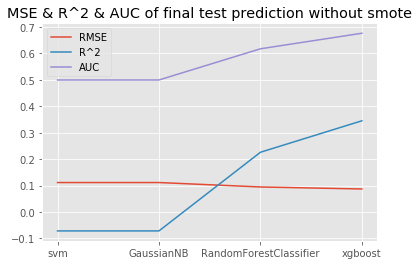

In [188]:
plt.plot(['svm','GaussianNB','RandomForestClassifier', 'xgboost'],[RMSE_svm, RMSE_gnb, RMSE_rf, RMSE_xgb],label='RMSE')
plt.plot([r2_svm, r2_gnb, r2_rf, r2_xgb],label='R^2')
plt.plot([auc_svm, auc_gnb, auc_rf, auc_xgb],label='AUC')
plt.legend()
plt.title('MSE & R^2 & AUC of final test prediction without smote')
#plt.savefig(plot_path+'MSE_R2_linear_pred')
plt.show()

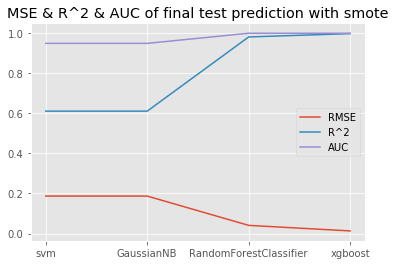

In [187]:
plt.plot(['svm','GaussianNB','RandomForestClassifier', 'xgboost'],[RMSE_svm_smote, RMSE_gnb_smote, RMSE_rf_smote, RMSE_xgb_smote],label='RMSE')
plt.plot([r2_svm_smote, r2_gnb_smote, r2_rf_smote, r2_xgb_smote],label='R^2')
plt.plot([auc_svm_smote, auc_gnb_smote, auc_rf_smote, auc_xgb_smote],label='AUC')
plt.legend()
plt.title('MSE & R^2 & AUC of final test prediction with smote')
#plt.savefig(plot_path+'MSE_R2_linear_pred')
plt.show()

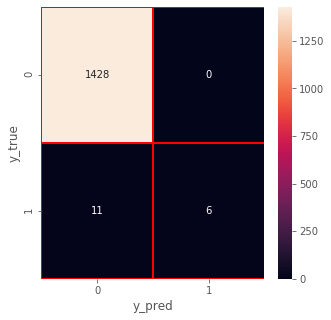

In [406]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_xgboost = confusion_matrix(yTest, y_predxgb)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm_xgboost,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

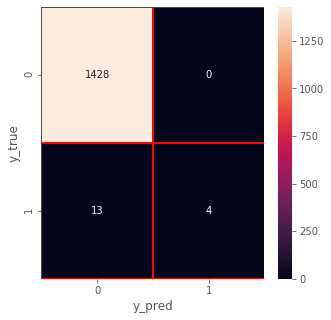

In [393]:
cm_rf = confusion_matrix(yTest, y_predrf)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm_rf,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

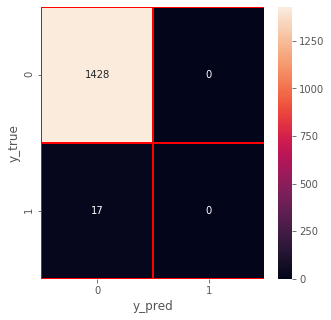

In [392]:
cm_lr = confusion_matrix(yTest, y_predictionlr)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm_lr,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

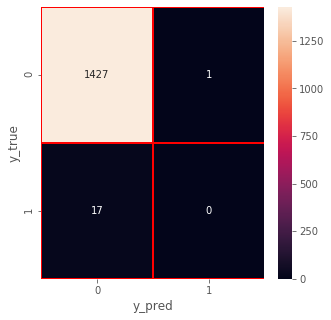

In [391]:
cm_svm = confusion_matrix(yTest, y_predictionsvm)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm_svm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

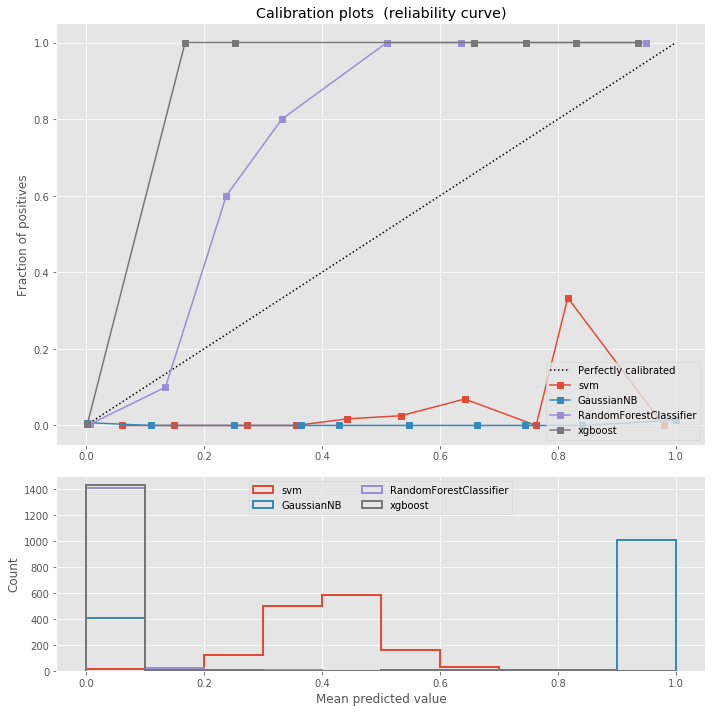

In [197]:
#https://scikit-learn.org/stable/auto_examples/calibration/plot_compare_calibration.html#sphx-glr-auto-examples-calibration-plot-compa
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for claf, name in [(clf, 'svm'),
                  (nf, 'GaussianNB'),
                  (rf_model, 'RandomForestClassifier'),
                  (xgb_model, 'xgboost')]:
    claf.fit(xTrain, yTrain)
    if hasattr(claf, "predict_proba"):
        prob_pos = claf.predict_proba(xTest)[:, 1]
    else:  # use decision function
        prob_pos = claf.decision_function(xTest)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(yTest, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

In [283]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier()]
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clfs in classifiers:
    clfs.fit(xTrain, yTrain)
    name = clfs.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clfs.predict(xTest)
    acc = accuracy_score(yTest, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clfs.predict_proba(xTest)
    ll = log_loss(yTest, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 98.7543%
Log Loss: 0.3226682648528149
SVC
****Results****
Accuracy: 98.8235%
Log Loss: 0.06491390539882295
DecisionTreeClassifier
****Results****
Accuracy: 98.4775%
Log Loss: 0.525849882829091
RandomForestClassifier
****Results****
Accuracy: 99.0311%
Log Loss: 0.05003439577036626
AdaBoostClassifier
****Results****
Accuracy: 99.0311%
Log Loss: 0.47561501828843017
GradientBoostingClassifier
****Results****
Accuracy: 97.5779%
Log Loss: 0.07044833489819559
GaussianNB
****Results****
Accuracy: 29.9654%
Log Loss: 19.937084439337397
LinearDiscriminantAnalysis
****Results****
Accuracy: 98.5467%
Log Loss: 0.4073057862813207
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 98.8927%
Log Loss: 0.3824362784211573
XGBClassifier
****Results****
Accuracy: 99.2388%
Log Loss: 0.03260554324800896


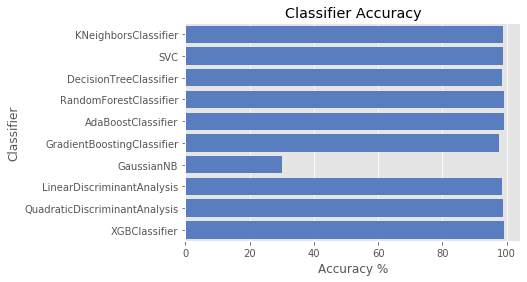

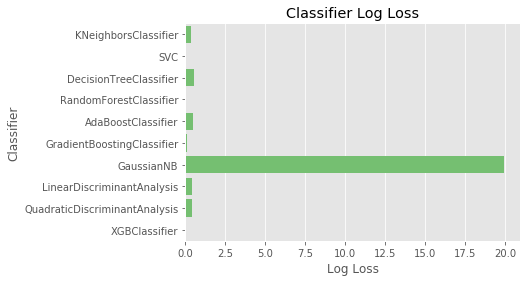

In [284]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

## Part 8 - Keras CNN 


In [407]:
import numpy as np
import pandas as pd
import gc
import time
import random
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from keras import backend as K
from keras.models import Sequential, load_model
from keras.optimizers import Adam, Nadam
from keras.initializers import glorot_uniform, lecun_uniform
from keras.layers import Dense, Conv1D, Flatten, MaxPool1D, Dropout, Activation, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Random Seed
seed = 12345
np.random.seed(seed)
random.seed(seed)
# Constants
epochs = 100
batch_size = 1024
number_of_folds = 6

In [408]:
# Categorical features
cat_feats = ['ProductCD', 'addr1', 'addr2', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
                        'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']

# Low score Features
lowscore_feats =   ['V322','V329','V321','V336','V331','V335','V330','V332','V328','V338','V327','V137','V333','V326','V116','V339','V337',
                    'V334','V114','V115','V163','V298','V162','V142','V141','V325','V129','V138','V161','V100','V296','V112','V105',
                    'V113','V111','V106','V299','V98','V110','V301','V108','V135','V109','V319','V104','V300','V297','V119','V311',
                    'V117','V41','V118','V121','V122','V286','V120','V107','V305']

In [409]:
# Load Data
train = pd.read_csv('C:/Users/youssef/Desktop/IEEE-Fraud-Detection/Nouveau dossier/train_transaction.csv')
labels = train['isFraud']
test = pd.read_csv('C:/Users/youssef/Desktop/IEEE-Fraud-Detection/Nouveau dossier/test_transaction.csv')

# Drop Columns
test.drop(lowscore_feats, axis = 1, inplace = True)
train.drop(lowscore_feats, axis = 1, inplace = True)
train.drop(['isFraud'], axis=1, inplace = True)

# Summary Shapes
print('====== Dataset Shapes')
print('Train Transaction: {0}'.format(train.shape))
print('Test Transaction: {0}'.format(test.shape))
print('Labels: {0}'.format(labels.shape))

====== Dataset Shapes
Train Transaction: (3999, 335)
Test Transaction: (3999, 335)
Labels: (3999,)


In [410]:
# Append Train and Test Datasets
train_len = len(train)
df = train.append(test).reset_index()

# Cleanup
del train, test
gc.collect()

# Impute Mean value for features that have less than 10K NaN values
processed_feats = []
for feat in [f for f in df.columns if f not in ['index', 'TransactionID', 'TransactionDT'] + cat_feats + lowscore_feats]:
    if df[feat].isna().sum() < 10000:
        imputer = SimpleImputer(strategy = 'mean')
        df[feat] = imputer.fit_transform(df[feat].values.reshape(-1, 1))
        processed_feats.append(feat)       

In [411]:
# Process TransactionDT into hour and weekday
df['hour'] = df['TransactionDT'].map(lambda x:(x // 3600) % 24)
df['weekday'] = df['TransactionDT'].map(lambda x:(x // (3600 * 24)) % 7)

In [412]:
# Count encode all categorical features
for feat in cat_feats:
    df[feat] = df[feat].map(df[feat].value_counts(dropna = False))

# Count encode all other remaining 'Numerical' Features
for feat in [f for f in df.columns if f not in ['index', 'TransactionID', 'TransactionDT'] + cat_feats + processed_feats]:
    df[feat] = df[feat].map(df[feat].value_counts(dropna = False))

In [413]:
# Get Final Features
feats = [f for f in df.columns if f not in ['index', 'TransactionID', 'TransactionDT'] + lowscore_feats]

# Scale and correct extreme skew
scaler = preprocessing.MinMaxScaler()
for feat in feats:
    # Scale
    df[feat] = scaler.fit_transform(df[feat].values.reshape(-1, 1))
    
    # Correct Skew
    if df[feat].skew() > 10:
        df[feat] = np.log10(df[feat] + 1 - min(0, df[feat].min()))

In [414]:
# Split back to train and test dataset  
train = df[:train_len]
test = df[train_len:]

# Final Summary Shapes
print('====== Final Dataset Shapes')
print('Train Transaction: {0}'.format(train[feats].shape))
print('Test Transaction: {0}'.format(test[feats].shape))
print('Labels: {0}'.format(labels.shape))

====== Final Dataset Shapes
Train Transaction: (3999, 335)
Test Transaction: (3999, 335)
Labels: (3999,)


In [415]:
def EarlyStop(patience):
    return EarlyStopping(monitor = "val_loss",
                          min_delta = 0,
                          mode = "min",
                          verbose = 1, 
                          patience = patience)

def ModelCheckpointFull(model_name):
    return ModelCheckpoint(model_name, 
                            monitor = 'val_loss', 
                            verbose = 1, 
                            save_best_only = True, 
                            save_weights_only = False, 
                            mode = 'min', 
                            period = 1)
# Input Shape
input_shape = train[feats].shape[1]

# Define CNN 1D model
def create_model():
    model = Sequential()
    model.add(Conv1D(96, 2, activation = 'relu', input_shape=(input_shape, 1), kernel_initializer = glorot_uniform(seed = seed)))
    model.add(BatchNormalization())       
    model.add(Dropout(0.25))
    model.add(Conv1D(96, 1, activation = 'relu', kernel_initializer = glorot_uniform(seed = seed)))
    model.add(BatchNormalization())       
    model.add(Flatten())
    model.add(Dropout(0.25))    
    model.add(Dense(96, activation = 'relu', kernel_initializer = glorot_uniform(seed = seed)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = glorot_uniform(seed = seed)))
    model.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])
    
    return model

In [416]:
# Reshape
train = train[feats].values.reshape(-1, input_shape, 1)
test = test[feats].values.reshape(-1, input_shape, 1)

# CV Folds
folds = StratifiedKFold(n_splits = number_of_folds, shuffle = True, random_state = seed)

# Arrays to store predictions
oof_preds = np.zeros(train.shape[0])
sub_preds = np.zeros(test.shape[0])

# Loop through folds
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train, labels)):
    train_x, train_y = train[train_idx], labels.iloc[train_idx]
    valid_x, valid_y = train[valid_idx], labels.iloc[valid_idx]

    print('Running Fold: ' + str(n_fold))

    # CNN 1D model
    model = create_model()
    model.fit(train_x, train_y, 
                validation_data=(valid_x, valid_y), 
                epochs=epochs, 
                batch_size=batch_size, 
                verbose=0,
                callbacks=[EarlyStop(10), ModelCheckpointFull('model.h5')])
 # Delete Model
    del model
    gc.collect()

    # Reload Best Saved Model
    model = load_model('model.h5')

    # OOF Predictions
    oof_preds[valid_idx] = model.predict(valid_x).reshape(-1,)
    
    # Submission Predictions
    predictions = model.predict(test).reshape(-1,)
    sub_preds += predictions / number_of_folds

    # Fold AUC Score
    print('Fold %2d AUC : %.6f' % (n_fold, roc_auc_score(valid_y, oof_preds[valid_idx])))        

    # Cleanup 
    del model, train_x, train_y, valid_y, valid_x
    K.clear_session()
    gc.collect

print('Full AUC score %.6f' % roc_auc_score(labels, oof_preds))

Running Fold: 0

Epoch 00001: val_loss improved from inf to 0.72563, saving model to model.h5

Epoch 00002: val_loss improved from 0.72563 to 0.71691, saving model to model.h5

Epoch 00003: val_loss improved from 0.71691 to 0.68353, saving model to model.h5

Epoch 00004: val_loss improved from 0.68353 to 0.65084, saving model to model.h5

Epoch 00005: val_loss improved from 0.65084 to 0.63126, saving model to model.h5

Epoch 00006: val_loss improved from 0.63126 to 0.60662, saving model to model.h5

Epoch 00007: val_loss improved from 0.60662 to 0.59995, saving model to model.h5

Epoch 00008: val_loss improved from 0.59995 to 0.57669, saving model to model.h5

Epoch 00009: val_loss improved from 0.57669 to 0.56842, saving model to model.h5

Epoch 00010: val_loss improved from 0.56842 to 0.53299, saving model to model.h5

Epoch 00011: val_loss improved from 0.53299 to 0.50837, saving model to model.h5

Epoch 00012: val_loss improved from 0.50837 to 0.50643, saving model to model.h5

Epo


Epoch 00033: val_loss improved from 0.23022 to 0.22608, saving model to model.h5

Epoch 00034: val_loss improved from 0.22608 to 0.22075, saving model to model.h5

Epoch 00035: val_loss improved from 0.22075 to 0.21364, saving model to model.h5

Epoch 00036: val_loss improved from 0.21364 to 0.20605, saving model to model.h5

Epoch 00037: val_loss improved from 0.20605 to 0.18761, saving model to model.h5

Epoch 00038: val_loss improved from 0.18761 to 0.18302, saving model to model.h5

Epoch 00039: val_loss improved from 0.18302 to 0.18293, saving model to model.h5

Epoch 00040: val_loss improved from 0.18293 to 0.17385, saving model to model.h5

Epoch 00041: val_loss improved from 0.17385 to 0.16175, saving model to model.h5

Epoch 00042: val_loss improved from 0.16175 to 0.15233, saving model to model.h5

Epoch 00043: val_loss improved from 0.15233 to 0.15204, saving model to model.h5

Epoch 00044: val_loss improved from 0.15204 to 0.14616, saving model to model.h5

Epoch 00045: va


Epoch 00028: val_loss improved from 0.34103 to 0.32790, saving model to model.h5

Epoch 00029: val_loss improved from 0.32790 to 0.31202, saving model to model.h5

Epoch 00030: val_loss improved from 0.31202 to 0.29352, saving model to model.h5

Epoch 00031: val_loss improved from 0.29352 to 0.27150, saving model to model.h5

Epoch 00032: val_loss improved from 0.27150 to 0.25191, saving model to model.h5

Epoch 00033: val_loss improved from 0.25191 to 0.23726, saving model to model.h5

Epoch 00034: val_loss improved from 0.23726 to 0.22653, saving model to model.h5

Epoch 00035: val_loss improved from 0.22653 to 0.22243, saving model to model.h5

Epoch 00036: val_loss improved from 0.22243 to 0.21692, saving model to model.h5

Epoch 00037: val_loss improved from 0.21692 to 0.20569, saving model to model.h5

Epoch 00038: val_loss improved from 0.20569 to 0.19878, saving model to model.h5

Epoch 00039: val_loss improved from 0.19878 to 0.19213, saving model to model.h5

Epoch 00040: va

## Part 9 - GAN


In [307]:
DF1 = pd.read_csv('C:/Users/youssef/Desktop/IEEE-Fraud-Detection/Nouveau dossier/train_transaction.csv')
DF2 = pd.read_csv('C:/Users/youssef/Desktop/IEEE-Fraud-Detection/Nouveau dossier/train_identity.csv')
DF = pd.merge(DF1, DF2, on='TransactionID', how='outer')
NAcat=DF.select_dtypes(exclude='object')


In [369]:

# reloading the libraries and setting the parameters


import GAN_171103
import importlib
importlib.reload(GAN_171103) # For reloading after making changes
from GAN_171103 import *

rand_dim = 32 # 32 # needs to be ~data_dim
base_n_count = 128 # 128

nb_steps = 500 + 1 # 50000 # Add one for logging of the last interval
batch_size = 128 # 64

k_d = 1  # number of critic network updates per adversarial training step
k_g = 1  # number of generator network updates per adversarial training step
critic_pre_train_steps = 100 # 100  # number of steps to pre-train the critic before starting adversarial training
log_interval = 100 # 100  # interval (in steps) at which to log loss summaries and save plots of image samples to disc
learning_rate = 5e-4 # 5e-5
data_dir = 'cache/'
generator_model_path, discriminator_model_path, loss_pickle_path = None, None, None

# show = False
show = True 

# train = create_toy_spiral_df(1000)
# train = create_toy_df(n=1000,n_dim=2,n_classes=4,seed=0)
train = NAcat.copy().reset_index(drop=True) # fraud only with labels from classification
# train = pd.get_dummies(train, columns=['Class'], prefix='Class', drop_first=True)
label_cols = [ i for i in train.columns if 'isFraud' in i ]

data_cols = [ i for i in train.columns if i not in label_cols ]

train_no_label = train[ data_cols ]

data_dim:  402
data_cols:  ['TransactionID', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 

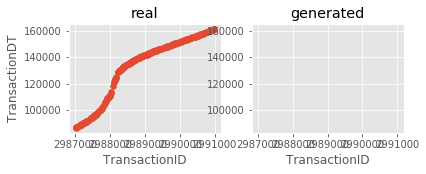

FailedPreconditionError:  Error while reading resource variable _AnonymousVar1270 from Container: localhost. This could mean that the variable was uninitialized. Not found: Resource localhost/_AnonymousVar1270/class tensorflow::Var does not exist.
	 [[node mul_396/ReadVariableOp (defined at C:\Users\youssef\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]] [Op:__inference_keras_scratch_graph_80118]

Function call stack:
keras_scratch_graph


In [371]:
%%time

# Training the vanilla GAN and CGAN architectures

k_d = 1  # number of critic network updates per adversarial training step
learning_rate = 5e-4 # 5e-5
arguments = [rand_dim, nb_steps, batch_size, 
             k_d, k_g, critic_pre_train_steps, log_interval, learning_rate, base_n_count,
            data_dir, generator_model_path, discriminator_model_path, loss_pickle_path, show ]

adversarial_training_GAN(arguments, train_no_label, data_cols ) # GAN
adversarial_training_GAN(arguments, train, data_cols=data_cols, label_cols=label_cols ) # CGAN

In [ ]:
%%time

# Training the WGAN and WCGAN architectures

k_d = 5 # train critic to optimal state each time
learning_rate = 1e-4 # 5e-5
arguments = [rand_dim, nb_steps, batch_size, 
             k_d, k_g, critic_pre_train_steps, log_interval, learning_rate, base_n_count,
            data_dir, generator_model_path, discriminator_model_path, loss_pickle_path, show ]

adversarial_training_WGAN(arguments, train_no_label, data_cols=data_cols ) # WGAN
adversarial_training_WGAN(arguments, train, data_cols=data_cols, label_cols=label_cols ) # WCGAN